In [3]:
#source https://www.kaggle.com/youhanlee/would-it-be-possible-to-predict-success-of-app
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.8)

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import missingno as msno
import random

from plotly import tools

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# 1. Check dataset

## 1.1 Read dataset

In [4]:
df_app = pd.read_csv('appstore/AppleStore.csv')
df_description = pd.read_csv('appstore/appleStore_description.csv')

In [8]:
df_app.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
df_app.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

- There aren't null data in the df_app.

In [6]:
df_description.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [7]:
df_description.isnull().sum()

id            0
track_name    0
size_bytes    0
app_desc      0
dtype: int64

- There aren't null data in the df_description.

- We can merge df_app with description based on 'id'.

## 1.2 Merge datasets

In [15]:
df_app['app_desc'] = df_description['app_desc']

- Delete 'Unnamed: 0'.

In [10]:
df_app = df_app.iloc[:, 1:]

In [11]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


## 1.3 Add new columns

- For convenience, Change the unit of size_bytes into Megabytes.

In [12]:
df_app['size_bytes_in_MB'] = df_app['size_bytes'] / (1024 * 1024.0)

# 1.4 Free, Non Free

- Add isNotFree column.

In [13]:
df_app['isNotFree'] = df_app['price'].apply(lambda x: 1 if x > 0 else 0)

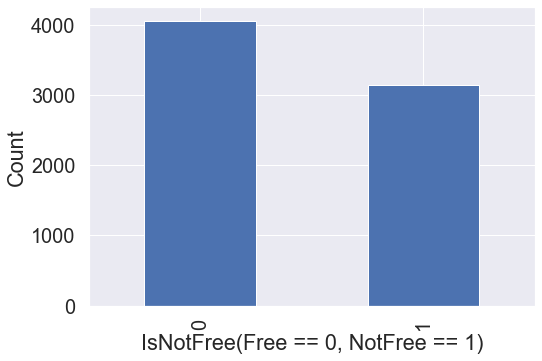

In [14]:
df_app['isNotFree'].value_counts().plot.bar()
plt.xlabel('IsNotFree(Free == 0, NotFree == 1)')
plt.ylabel('Count')
plt.show()

- As you can see, there are many free Apps. It will be interesting to analyze the df_app depending on free ore not free.
- Let's make the two dataframes for free and not-free.

In [16]:
df_app_notfree = df_app[df_app['isNotFree'] == 1]
df_app_free = df_app[df_app['isNotFree'] == 0]

print('There are {} Not-Free Apps in this dataset'.format(df_app_notfree.shape[0]))
print('There are {} Free Apps in this dataset'.format(df_app_free.shape[0]))

There are 3141 Not-Free Apps in this dataset
There are 4056 Free Apps in this dataset


# 2. Prime_genre

## 2.1 Countplot for each type of Prime_genre

In [18]:
def random_color_generator(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

cnt_srs = df_app['prime_genre'].value_counts()
text = ['{:.2f}%'.format(100 * (value / cnt_srs.sum())) for value in cnt_srs.values]

trace = go.Bar(
    x = cnt_srs.index,
    y = cnt_srs.values,
    text = text,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)
data = [trace]

layout = go.Layout(
    title = 'Prime genre',
    margin = dict(
        l = 100
    ),
    xaxis = dict(
        title = 'Genre'
    ),
    yaxis = dict(
        title = 'Count'
    ),
    width = 800,
    height = 500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

- With not considering 'isNotFree', Games are the most numerous, followed by Entertainment, Education, Photo & Video.

In [19]:
cnt_srs1 = df_app_free['prime_genre'].value_counts()
text1 = ['{:.2f}%'.format(100 * (value / cnt_srs1.sum())) for value in cnt_srs1.values]

trace1 = go.Bar(
    x = cnt_srs1.index,
    y = cnt_srs1.values,
    text = text1,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)

cnt_srs2 = df_app_notfree['prime_genre'].value_counts()
text2 = ['{:.2f}%'.format(100 * (value / cnt_srs2.sum())) for value in cnt_srs2.values]

trace2 = go.Bar(
    x = cnt_srs2.index,
    y = cnt_srs2.values,
    text = text2,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)

trace3 = go.Bar(
    x = cnt_srs1.index,
    y = cnt_srs1.values,
    text = text1,
    opacity = 0.7,
    name='Free'
)


trace4 = go.Bar(
    x = cnt_srs2.index,
    y = cnt_srs2.values,
    text = text2,
    opacity = 0.7,
    name='Not-Free'
)



fig = tools.make_subplots(rows=2, cols=2, specs = [[{}, {}], [{'colspan':2}, None]], 
                          subplot_titles=('(1) Countplot for Prime_genre of Free', '(2) Countplot for Prime_genre of Not-Free', 
                                          '(3) Grouped barplot containing Free(green) and Not-Free(red)'), print_grid=False)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)

fig['layout']['yaxis1'].update(title='Count')
fig['layout']['yaxis2'].update(title='Count')
fig['layout']['yaxis3'].update(title='Count')

fig['layout'].update(showlegend=False, width=800, height=800)

py.iplot(fig)

### Figure 1
- For Free App, Top 3 is below.

(1) Games (2) Entertainments (3) Photo & Video
### Figure 2

- For Not-Free App, Top 3 is below

(1) Games (2) Education (3) Entertainments
### Figure 3

- Many social network App is free.

- below are Not-free social networking App. Do you know these Apps?

In [ ]:
for app in df_app.loc[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Social Networking'), 'track_name'].values:
    print(app)

## 2.2 User rating depending on price_genre

In [ ]:
cnt_srs = df_app[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)

trace = go.Bar(
    x = cnt_srs.index,
    y = cnt_srs.values,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)
data = [trace]

layout = go.Layout(
    title = 'User rating depending on Prime genre',
    margin = dict(
        l = 100
    ),
    xaxis = dict(
        title = 'Genre'
    ),
    yaxis = dict(
        title = 'Mean User Rating'
    ),
    width = 800,
    height = 500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

- With not considering 'isNotFree', The Apps for Productivity, Music and Photo & Vidio have higher mean user rating.
- The mean user rating of Book, Finance and Catalogs are less than 2.5.

In [ ]:
cnt_srs1 = df_app_free[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
text1 = ['{:.2f}%'.format(100 * (value / cnt_srs1.sum())) for value in cnt_srs1.values]

trace1 = go.Bar(
    x = cnt_srs1.index,
    y = cnt_srs1.values,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)

cnt_srs2 = df_app_notfree[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
text2 = ['{:.2f}%'.format(100 * (value / cnt_srs2.sum())) for value in cnt_srs2.values]

trace2 = go.Bar(
    x = cnt_srs2.index,
    y = cnt_srs2.values,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)

trace3 = go.Bar(
    x = cnt_srs1.index,
    y = cnt_srs1.values,
    opacity = 0.7,
    name='Free'
)


trace4 = go.Bar(
    x = cnt_srs2.index,
    y = cnt_srs2.values,
    opacity = 0.7,
    name='Not-Free'
)



fig = tools.make_subplots(rows=2, cols=2, specs = [[{}, {}], [{'colspan':2}, None]], 
                          subplot_titles=('(1) Mean user rating of Free', '(2) Mean user rating of Not-Free', 
                                          '(3) Grouped barplot containing Free(green) and Not-Free(red)'), print_grid=False)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)

fig['layout']['yaxis1'].update(title='Mean User Rating')
fig['layout']['yaxis2'].update(title='Mean User Rating')
fig['layout']['yaxis3'].update(title='Mean User Rating')
fig['layout'].update(showlegend=False, width=800, height=800)

py.iplot(fig)

### Figure 1
- For Free App, Top 3 is below.

(1) Productivity (2) Music (3) Photo & Video
### Figure 2

- For Not-Free App, Top 3 is below

(1) Catalogs (2) Shopping (3) Productivity
### Figure 3

- Book, Catalogs and Navigation Apps have much higher ratings when they are Not-free.

## 2.3 App size based on price_genre

In [ ]:
cnt_srs = df_app[['prime_genre', 'size_bytes_in_MB']].groupby('prime_genre').mean()['size_bytes_in_MB'].sort_values(ascending=False)
text = ['{:.2f}'.format(value) for value in cnt_srs.values]

trace = go.Bar(
    x = cnt_srs.index,
    y = cnt_srs.values,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)
data = [trace]

layout = go.Layout(
    title = 'Mean App size(MB) depending on Prime genre',
    margin = dict(
        l = 100
    ),
    xaxis = dict(
        title = 'Genre'
    ),
    yaxis = dict(
        title = 'Mean App size'
    ),
    width = 800,
    height = 500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

- With not considering 'isNotFree', Medical App has the largest size of ~400MB, followed by Games(~300MB).

In [ ]:
cnt_srs1 = df_app_free[['prime_genre', 'size_bytes_in_MB']].groupby('prime_genre').mean()['size_bytes_in_MB'].sort_values(ascending=False)
text1 = ['{:.2f}%'.format(100 * (value / cnt_srs1.sum())) for value in cnt_srs1.values]

trace1 = go.Bar(
    x = cnt_srs1.index,
    y = cnt_srs1.values,
    text = text1,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)

cnt_srs2 = df_app_notfree[['prime_genre', 'size_bytes_in_MB']].groupby('prime_genre').mean()['size_bytes_in_MB'].sort_values(ascending=False)
text2 = ['{:.2f}%'.format(100 * (value / cnt_srs2.sum())) for value in cnt_srs2.values]

trace2 = go.Bar(
    x = cnt_srs2.index,
    y = cnt_srs2.values,
    text = text2,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)

trace3 = go.Bar(
    x = cnt_srs1.index,
    y = cnt_srs1.values,
    text = text1,
    opacity = 0.7,
    name='Free'
)


trace4 = go.Bar(
    x = cnt_srs2.index,
    y = cnt_srs2.values,
    text = text2,
    opacity = 0.7,
    name='Not-Free'
)



fig = tools.make_subplots(rows=2, cols=2, specs = [[{}, {}], [{'colspan':2}, None]], subplot_titles=('Free', 'Not-Free', 'third'), print_grid=False)
fig = tools.make_subplots(rows=2, cols=2, specs = [[{}, {}], [{'colspan':2}, None]], 
                          subplot_titles=('(1) Mean App size(MB) of Free', '(2) Mean App size(MB) of Not-Free', 
                                          '(3) Grouped barplot containing Free(green) and Not-Free(red)'), print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)

fig['layout']['yaxis1'].update(title='Mean App size(MB)')
fig['layout']['yaxis2'].update(title='Mean App size(MB)')
fig['layout']['yaxis3'].update(title='Mean App size(MB)')
fig['layout'].update(showlegend=False, width=800, height=800)

py.iplot(fig)

### Figure 1
- For Free App, Top 3 is below.

(1) Games (2) Medical (3) Education
### Figure 2

- For Not-Free App, Top 3 is below

(1) Medical (2) Games (3) Book
### Figure 3

- The bytesize of Not-Free Book, Catalogs and Medical Apps are more than 2 times than that of Free Book, Catalogs and Medical Apps.
- Because the service form of  those 3 Apps is information, the price for Apps have a relationship with the amount of information.
- For Games, I think the price is responsible for high quality graphic, good interface, etc.

## 2.4 App price based on prime_genre

- Medical App is the most expensive, near to 9\$.
- The Apps (Business, Reference, Music, Productivity, Navigation, Education) have the mean price near to 5$.

In [ ]:
cnt_srs = df_app_notfree[['prime_genre', 'price']].groupby('prime_genre').mean()['price'].sort_values(ascending=False)
text = ['{:.2f}%'.format(100 * (value / cnt_srs.sum())) for value in cnt_srs.values]

trace = go.Bar(
    x = cnt_srs.index,
    y = cnt_srs.values,
    text = text,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)
data = [trace]

layout = go.Layout(
    title = 'Mean App price of Not-Free Apps',
    margin = dict(
        l = 100
    ),
    yaxis = dict(
        title = 'Mean App price'
    ),
    width = 800,
    height = 500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

- When considering only Not-Free apps, Medical App is the most expensive, near to 14$.

# 3. Rating change

In [ ]:
sns.lmplot(x='user_rating', y='user_rating_ver', hue='isNotFree', data=df_app)

# 4. Float columns

In [ ]:
df_temp = df_app.drop('id', axis=1)

In [ ]:
data = [
    go.Heatmap(
        z = df_temp.corr().values,
        x = df_temp.corr().columns.values,
        y = df_temp.corr().columns.values,
        colorscale='YlGnBu',
        reversescale=False,
    )
]

layout = go.Layout(
    title='Pearson Correlation of float-type features',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='' ),
    width = 800, height = 800,
    margin = dict(
        l = 100
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [ ]:
df_corr = df_app.drop('id', axis=1).corr()

In [ ]:
df_corr['user_rating'].sort_values(ascending=False)

In [ ]:
df_corr['price'].sort_values(ascending=False)

In [ ]:
plt.scatter(df_app['user_rating'], df_app['rating_count_ver'])

# 4. Description

In [ ]:
foo = df_app['app_desc'][0].split(' ')

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
%%time
for i in range(df_app.shape[0]):
    temp_desc = df_app['app_desc'][i]
    temp_word_list = nltk.word_tokenize(temp_desc)
    temp_word_list = [word.lower() for word in temp_word_list if word not in stopwords.words('english')]
    for char in " {}()#&[]^`´-_·@|¿?¡!'+*\"?.!/;:<>’•“”–»%■,":
        for ele in temp_word_list:
            if char in ele:
                temp_word_list.remove(ele)
    fdist = nltk.FreqDist(temp_word_list)
    temp_srs = pd.Series(fdist).sort_values(ascending=False)
    try:
        df_app.loc[i, 'most_freq_word_1'] = temp_srs.index[0]
        df_app.loc[i, 'most_freq_word_2'] = temp_srs.index[1]
        df_app.loc[i, 'most_freq_word_3'] = temp_srs.index[2]
    except:
        df_app.loc[i, 'most_freq_word_1'] = temp_srs.index[0]

In [ ]:
df_app.loc[df_app['user_rating'] > 4, 'most_freq_word_3'].value_counts().head(20).plot.bar()

In [ ]:
freq_total = nltk.FreqDist(df_app['most_freq_word_1'].tolist() + 
              df_app['most_freq_word_2'].tolist() +
             df_app['most_freq_word_3'].tolist())

In [ ]:
freq_total = pd.Series(freq_total).sort_values(ascending=False)

In [ ]:
freq_total.head(20).plot.bar()

# 4. Simple feature engineering and preparation

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df_app['rating_count_before'] = df_app['rating_count_tot'] - df_app['rating_count_ver']

In [ ]:
df_app.head()

In [ ]:
df_train = df_app[['size_bytes_in_MB', 'isNotFree', 'price', 'rating_count_before', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'prime_genre']]
target = df_app['user_rating']

df_train = pd.get_dummies(df_train)

def categorize_rating(x):
    if x <= 4:
        return 0
    else:
        return 1

target = target.apply(categorize_rating)

target.astype(str).hist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2, random_state=1989, stratify=target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# 5. Success prediction

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
models = [RandomForestClassifier(), LGBMClassifier(), XGBClassifier()]

kfold = KFold(n_splits=5, random_state=1989)

clf_comparison = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score'])

for i, model in enumerate(models):
    clf = model
    cv_result = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy')
    clf_comparison.loc[i, 'Classfier_name'] = model.__class__.__name__
    clf_comparison.loc[i, 'train_score'] = cv_result['train_score'].mean()
    clf_comparison.loc[i, 'test_score'] = cv_result['test_score'].mean()

clf_comparison

# 6. Success prediction with description variable

In [ ]:
df_app.loc[:, 'isGame'] = df_app['app_desc'].apply(lambda x: 1 if 'game' in x.lower() else 0)

In [ ]:
df_app.loc[:, 'descLen'] = df_app['app_desc'].apply(lambda x: len(x.lower()))

In [ ]:
df_train = df_app[['size_bytes_in_MB', 'isNotFree', 'price', 'rating_count_before', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'prime_genre', 'isGame', 'descLen']]
target = df_app['user_rating']

df_train = pd.get_dummies(df_train)

def categorize_rating(x):
    if x <= 4:
        return 0
    else:
        return 1

target = target.apply(categorize_rating)

target.astype(str).hist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2, random_state=1989, stratify=target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

In [ ]:
models = [RandomForestClassifier(), LGBMClassifier(), XGBClassifier()]

kfold = KFold(n_splits=5, random_state=1989)

clf_comparison = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score'])

for i, model in enumerate(models):
    clf = model
    cv_result = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy')
    clf_comparison.loc[i, 'Classfier_name'] = model.__class__.__name__
    clf_comparison.loc[i, 'train_score'] = cv_result['train_score'].mean()
    clf_comparison.loc[i, 'test_score'] = cv_result['test_score'].mean()

clf_comparison

# Conclusion
- At the beginning, I set a multi class classfication problem to predict user_rating using this dataset. I categorized user ratings into 5 groups, (1) 0~1 (2) 1~2 (3) 2~3 (4) 3~4 (5) 4~5.
- But, the output was bad.

- For now, I set a binary classfication problem to predict success of apps. I supposed that app which has more than 4 user_rating is succeful. 
- For this approach, the prediction accuracy is about 70%. It is not bad.
- I'm planning to add more features to improve the performance.